# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [6]:
print(cities)

['butaritari', 'sibolga', 'mys shmidta', 'mount darwin', 'tasiilaq', 'domoni', 'albany', 'codrington', 'busselton', 'mahebourg', 'ushuaia', 'bure', 'punta arenas', 'rikitea', 'maceio', 'hilo', 'port lincoln', 'vanimo', 'illoqqortoormiut', 'provideniya', 'guiratinga', 'hithadhoo', 'malanje', 'mataura', 'atuona', 'saskylakh', 'dingle', 'cape town', 'lompoc', 'maruko', 'jalingo', 'norman wells', 'salalah', 'port moresby', 'georgetown', 'hermanus', 'praxedis guerrero', 'hobart', 'saint-philippe', 'grindavik', 'san quintin', 'kapaa', 'atasu', 'college', 'santa cruz', 'qaqortoq', 'vaitupu', 'hasaki', 'grand river south east', 'isangel', 'tuatapere', 'alofi', 'longyearbyen', 'bengkulu', 'upernavik', 'bahia honda', 'constitucion', 'palabuhanratu', 'port alfred', 'tuktoyaktuk', 'bredasdorp', 'mayo', 'vila velha', 'korla', 'barrow', 'kermanshah', 'mercedes', 'goryachegorsk', 'lorengau', 'wanxian', 'kaitangata', 'vardo', 'westport', 'lebu', 'manta', 'sulangan', 'taolanaro', 'hofn', 'vaini', 'ingh

In [172]:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [9]:
# set up lists to hold reponse info
lat = []
long =[]
temp = []
humid= []
clouds =[]
wind =[]
country =[]
city_new=[]
count=1
set_count=1
# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrival")
print("------------------------------")

for city in cities:
     try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        city_new.append(response['name'])
        if count <= 50:
            print(f"Processing Record {count} of Set {set_count} | {city}")
            count += 1 
        else:
            count = 0
            set_count += 1
            print(f"Processing Record {count} of Set {set_count} | {city}")
            count += 1  
     except (KeyError, IndexError):
        print("City not found... skipping.")
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")


Beginning Data Retrival
------------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | sibolga
City not found... skipping.
Processing Record 3 of Set 1 | mount darwin
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | domoni
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | bure
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | maceio
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | vanimo
City not found... skipping.
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | guiratinga
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | malanje
Processing Record 22 of Set 1 | m

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": city_new,
    "country":country,
    "latitude": lat,
    "longitude": long,
    "temperature": temp,
    "humidity":humid,
    "windspeed":wind,
    "cloudiness":clouds
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,country,latitude,longitude,temperature,humidity,windspeed,cloudiness
0,Butaritari,KI,3.0707,172.7902,80.96,78,14.54,45
1,Sibolga,ID,1.7427,98.7792,76.82,91,2.48,91
2,Mount Darwin,ZW,-16.7725,31.5838,69.64,77,4.03,33
3,Tasiilaq,GL,65.6145,-37.6368,6.80,56,9.22,20
4,Domoni,KM,-12.2569,44.5319,80.92,79,1.30,65
...,...,...,...,...,...,...,...,...
548,Klyuchi,RU,52.2667,79.1667,17.28,96,5.55,14
549,Bucerías,MX,20.7500,-105.3333,73.40,60,5.75,40
550,Nyurba,RU,63.2842,118.3319,12.51,94,7.31,34
551,Kéfalos,GR,36.7453,26.9589,50.00,50,11.50,75


In [12]:
# exporting the dataframe in a csv file
weather_data.to_csv("../output_data/cities_weather.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [177]:
#  Get the indices of cities that have humidity over 100%.


In [13]:

data_df=weather_data[weather_data['humidity'] <=100]
data_df

,city,country,latitude,longitude,temperature,humidity,windspeed,cloudiness
0,Butaritari,KI,3.0707,172.7902,80.96,78,14.54,45
1,Sibolga,ID,1.7427,98.7792,76.82,91,2.48,91
2,Mount Darwin,ZW,-16.7725,31.5838,69.64,77,4.03,33
3,Tasiilaq,GL,65.6145,-37.6368,6.80,56,9.22,20
4,Domoni,KM,-12.2569,44.5319,80.92,79,1.30,65
...,...,...,...,...,...,...,...,...
548,Klyuchi,RU,52.2667,79.1667,17.28,96,5.55,14
549,Bucerías,MX,20.7500,-105.3333,73.40,60,5.75,40
550,Nyurba,RU,63.2842,118.3319,12.51,94,7.31,34
551,Kéfalos,GR,36.7453,26.9589,50.00,50,11.50,75


In [ ]:
# there is no city with humidity over 100

In [179]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# data_df=data_df.dropna()
# data_df=data_df.reset_index(drop=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

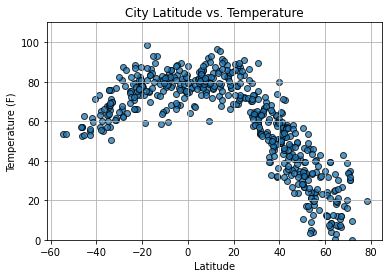

In [46]:
plt.scatter(weather_data["latitude"],weather_data["temperature"], marker="o",  alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.ylim(0,110)
plt.grid(True)
# saving graph to images
plt.savefig("images/latitude_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

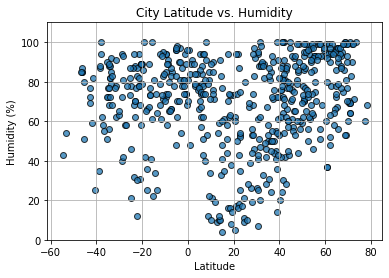

In [47]:
plt.scatter(weather_data["latitude"],weather_data["humidity"], marker="o",  alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,110)
plt.grid(True)
# saving graph to images
plt.savefig("images/latitude_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

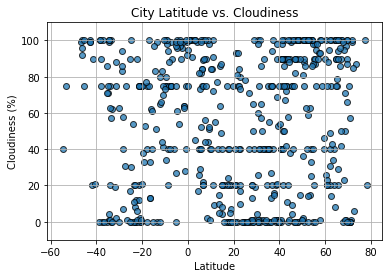

In [48]:
plt.scatter(weather_data["latitude"],weather_data["cloudiness"], marker="o",  alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-10,110)
plt.grid(True)
# saving graph to images
plt.savefig("images/latitude_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

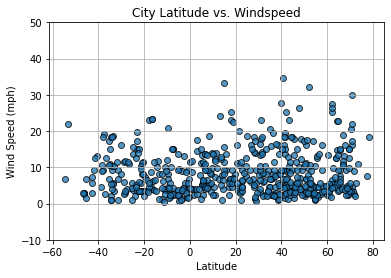

In [49]:
plt.scatter(weather_data["latitude"],weather_data["windspeed"], marker="o",  alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-10,50)
plt.grid(True)
# saving graph to images
plt.savefig("images/latitude_vs_windspeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [66]:
north_data=weather_data[weather_data['latitude']>=0]
north_data

,city,country,latitude,longitude,temperature,humidity,windspeed,cloudiness
0,Butaritari,KI,3.0707,172.7902,80.96,78,14.54,45
1,Sibolga,ID,1.7427,98.7792,76.82,91,2.48,91
3,Tasiilaq,GL,65.6145,-37.6368,6.80,56,9.22,20
5,Albany,US,42.6001,-73.9662,70.68,42,7.00,67
10,Burē,ET,10.7000,37.0667,71.98,21,4.54,84
...,...,...,...,...,...,...,...,...
548,Klyuchi,RU,52.2667,79.1667,17.28,96,5.55,14
549,Bucerías,MX,20.7500,-105.3333,73.40,60,5.75,40
550,Nyurba,RU,63.2842,118.3319,12.51,94,7.31,34
551,Kéfalos,GR,36.7453,26.9589,50.00,50,11.50,75


In [67]:
# Perform a linear regression on temperature vs. latitude
    
x_values=north_data['latitude']
y_values=north_data['temperature']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept


In [68]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.29x +98.47


The r-value is: 0.7836999468692369


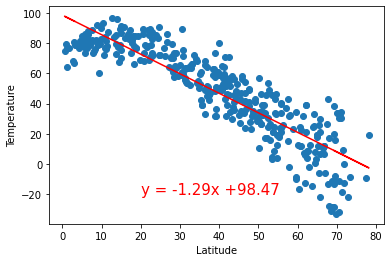

In [71]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,-20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
# saving graph to images
plt.savefig("images/Lin_reg_north_temp_vs_lat.png")
# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [31]:
south_data=weather_data[weather_data['latitude']<0]
south_data

,city,country,latitude,longitude,temperature,humidity,windspeed,cloudiness
2,Mount Darwin,ZW,-16.7725,31.5838,69.64,77,4.03,33
4,Domoni,KM,-12.2569,44.5319,80.92,79,1.30,65
6,Codrington,AU,-38.2667,141.9667,57.00,87,10.69,100
7,Busselton,AU,-33.6500,115.3333,50.50,92,5.66,0
8,Mahébourg,MU,-20.4081,57.7000,78.80,89,3.44,75
...,...,...,...,...,...,...,...,...
522,Ulundi,ZA,-28.3352,31.4162,62.29,93,3.51,40
523,Hokitika,NZ,-42.7167,170.9667,56.10,72,7.34,99
525,Biak,ID,-0.9131,122.8766,75.22,89,1.50,100
537,Nabire,ID,-3.3667,135.4833,75.88,90,3.67,99


The r-value is: 0.41719334466751584


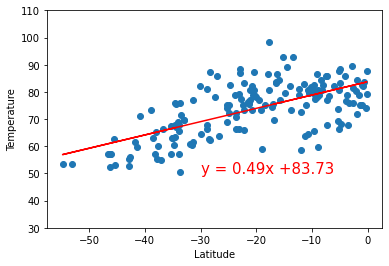

In [63]:
# Perform a linear regression on temperature vs. latitude
x_values=south_data['latitude']
y_values=south_data['temperature']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.ylim(30,110)
# Print r value
print(f"The r-value is: {rvalue**2}")
# saving graph to images
plt.savefig("images/Lin_reg_south_temp_vs_lat.png")
# Show plot
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10756850335282091


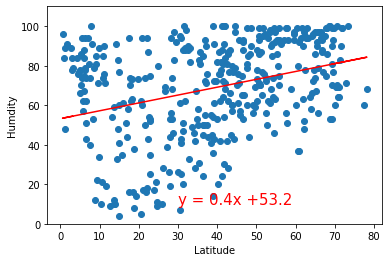

In [58]:
# Perform a linear regression on humidity vs. latitude
x_values=north_data['latitude']
y_values=north_data['humidity']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humdity')
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
plt.ylim(0,110)

# Print r value
print(f"The r-value is: {rvalue**2}")
# saving graph to images
plt.savefig("images/Lin_reg_north_humidity_vs_lat.png")
# Show plot
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.021330138027744232


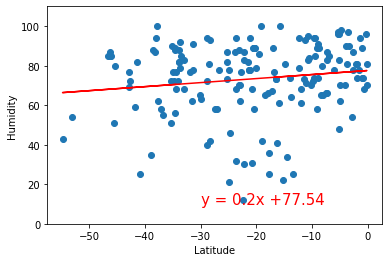

In [59]:
# Perform a linear regression on humidity vs. latitude
x_values=south_data['latitude']
y_values=south_data['humidity']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.ylim(0,110)
# Print r value
print(f"The r-value is: {rvalue**2}")
# saving graph to images
plt.savefig("images/Lin_reg_south_humidity_vs_lat.png")
# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.012698341748640986


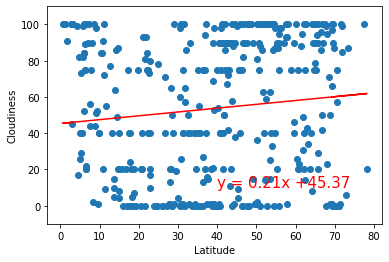

In [60]:
# Perform a linear regression on cloudiness vs. latitude
x_values=north_data['latitude']
y_values=north_data['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.ylim(-10,110)
# Print r value
print(f"The r-value is: {rvalue**2}")
# saving graph to images
plt.savefig("images/Lin_reg_north_clouds_vs_lat.png")
# Show plot
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.017104227135651105


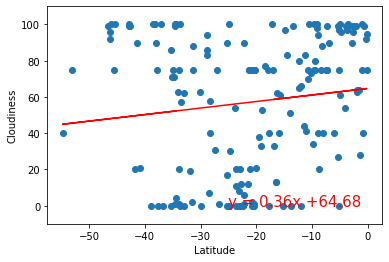

In [54]:
# Perform a linear regression on cloudiness vs. latitude
x_values=south_data['latitude']
y_values=south_data['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-25,0),fontsize=15,color="red")
plt.ylim(-10,110)
# Print r value
print(f"The r-value is: {rvalue**2}")
# saving graph to images
plt.savefig("images/Lin_reg_south_clouds_vs_lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 1.7163805346504008e-05


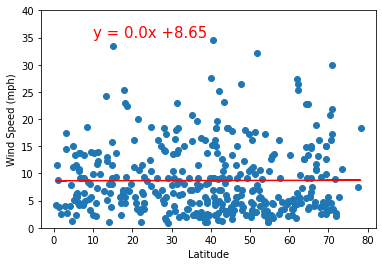

In [53]:
# Perform a linear regression on wind speed vs. latitude
x_values=north_data['latitude']
y_values=north_data['windspeed']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(10,35),fontsize=15,color="red")
plt.ylim(0,40)
# Print r value
print(f"The r-value is: {rvalue**2}")
# saving graph to images
plt.savefig("images/Lin_reg_north_wind_vs_lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03647713671305251


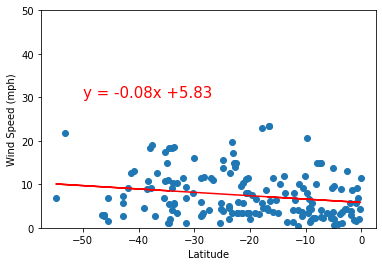

In [52]:
# Perform a linear regression on wind speed vs. latitude
x_values=south_data['latitude']
y_values=south_data['windspeed']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.ylim(0,50)
# Print r value
print(f"The r-value is: {rvalue**2}")
# saving graph to images
plt.savefig("images/Lin_reg_south_wind_vs_lat.png")
plt.show()